Import Libraries

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.util import hash_pandas_object
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

pd.set_option('display.max_columns', None)

Load Data

In [4]:
fraud_train = pd.read_csv('/content/drive/MyDrive/Shanti Dissertation Code/fraudTrain.csv', usecols = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'])
fraud_test = pd.read_csv('/content/drive/MyDrive/Shanti Dissertation Code/fraudTest.csv' , usecols = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'])

fraud_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraud_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Check if both fraud_train and fraud_test datasets have the same columns

In [6]:
def match_dataframe_columns(df_train, df_test):
    try:
        return(all(df_train.columns == df_test.columns))
    except:
        return(False)

match_dataframe_columns(fraud_train, fraud_test)

True

Append both dataset

In [7]:
fraud_data = pd.concat([fraud_train, fraud_test], ignore_index=False)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Convert date of birth to actual age. The purpose of this is to aid exploration and finding relations between the features in our dataset.

In [8]:
import pandas as pd
from datetime import datetime

# Convert 'dob' column to datetime
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])

# Calculate age
current_year = datetime.now().year
fraud_data['age'] = current_year - fraud_data['dob'].dt.year

# Drop the 'dob' column if no longer needed
fraud_data = fraud_data.drop(columns=['dob'])

# Print the updated dataset
fraud_data.head()



,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37


 Exploratory Data Analysis

 Handling duplicates

In [68]:
duplicate_rows_data = fraud_data[fraud_data.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 22)


Uniqueness

In [69]:
for column in fraud_data.columns:
    num_distinct_values = len(fraud_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

trans_date_trans_time: 1819551 distinct values
cc_num: 999 distinct values
merchant: 693 distinct values
category: 14 distinct values
amt: 60616 distinct values
first: 355 distinct values
last: 486 distinct values
gender: 2 distinct values
street: 999 distinct values
city: 906 distinct values
state: 51 distinct values
zip: 985 distinct values
lat: 983 distinct values
long: 983 distinct values
city_pop: 891 distinct values
job: 497 distinct values
trans_num: 1852394 distinct values
unix_time: 1819583 distinct values
merch_lat: 1754157 distinct values
merch_long: 1809753 distinct values
is_fraud: 2 distinct values
age: 82 distinct values


 Missing values

In [70]:
print(fraud_data.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
dtype: int64


Describe data - statistical analysis

In [71]:
fraud_data.describe().style.format('{:.2f}')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01,49.71
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07,17.39
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00,18.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00,36.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00,48.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00,61.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00,99.00


Bar plot for merchant

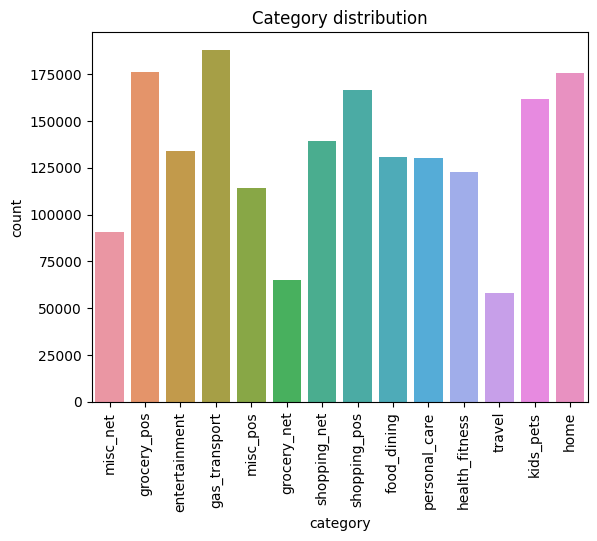

In [72]:
sns.countplot(x='category', data=fraud_data)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

 Histogram for amt

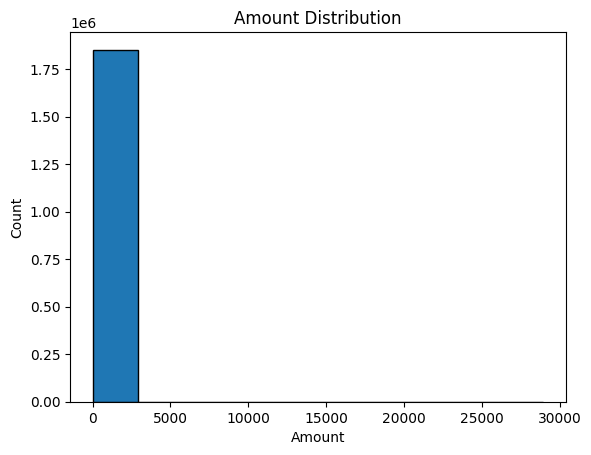

In [73]:
plt.hist(fraud_data['amt'], edgecolor='black')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

Bar plot for gender

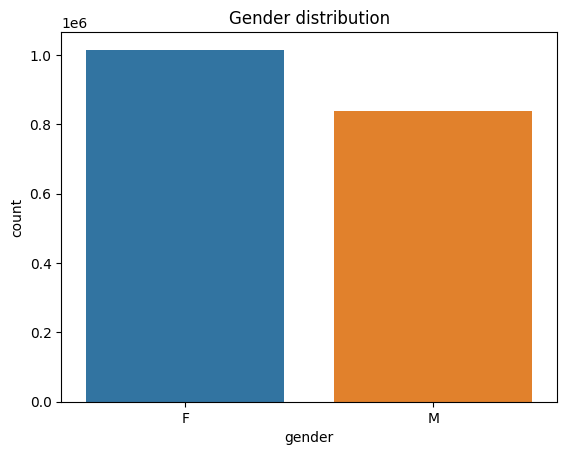

In [74]:
sns.countplot(x='gender', data=fraud_data)
plt.title('Gender distribution')
plt.show()

Bar plot for state

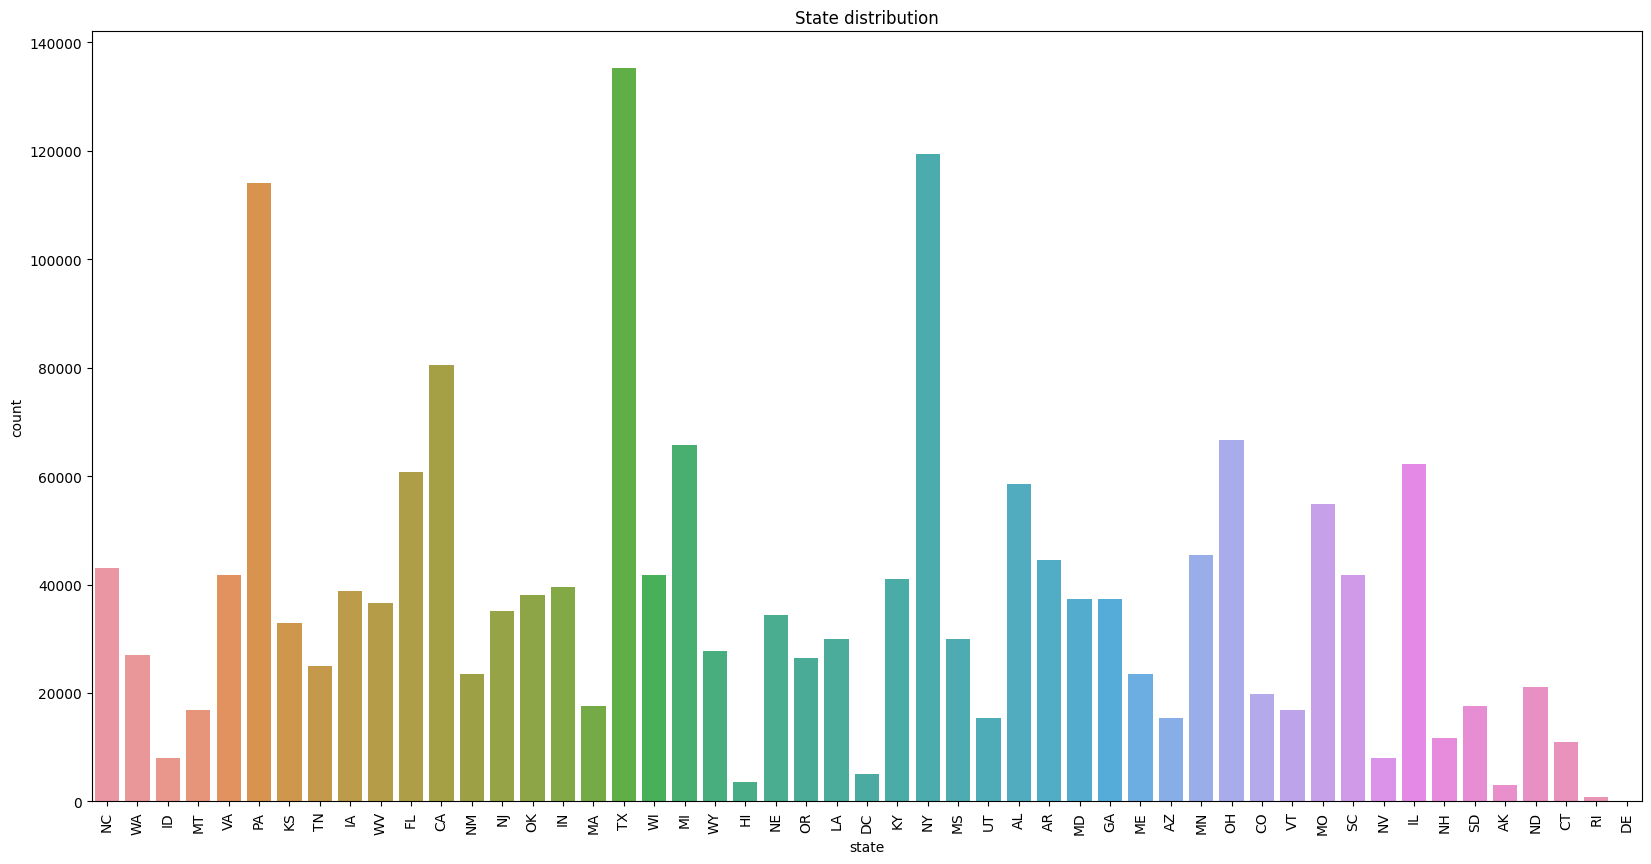

In [75]:
plt.figure(figsize=(20, 10))
sns.countplot(x='state', data=fraud_data)
plt.title('State distribution')
plt.xticks(rotation=90)
plt.show()

Histogram for age

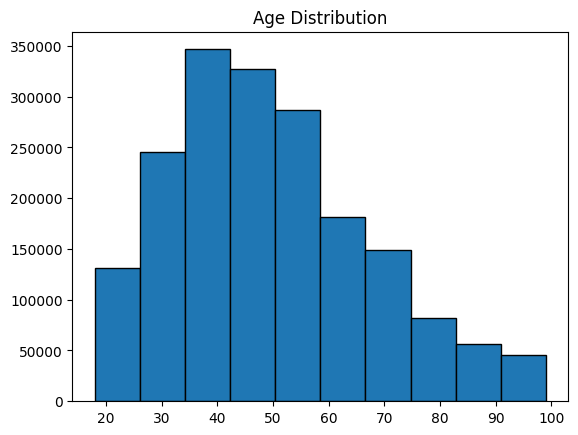

In [76]:
plt.hist(fraud_data['age'], edgecolor='black')
plt.title('Age Distribution')
plt.show()

Bar plot for is_fraud

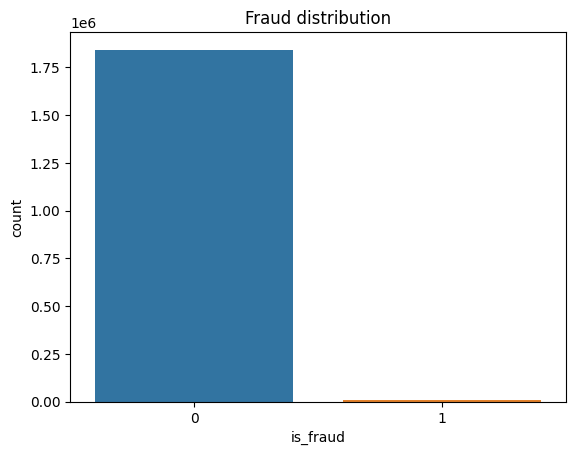

In [77]:
sns.countplot(x='is_fraud', data=fraud_data)
plt.title('Fraud distribution')
plt.show()


Boxplot Amount vs Fraud Classification

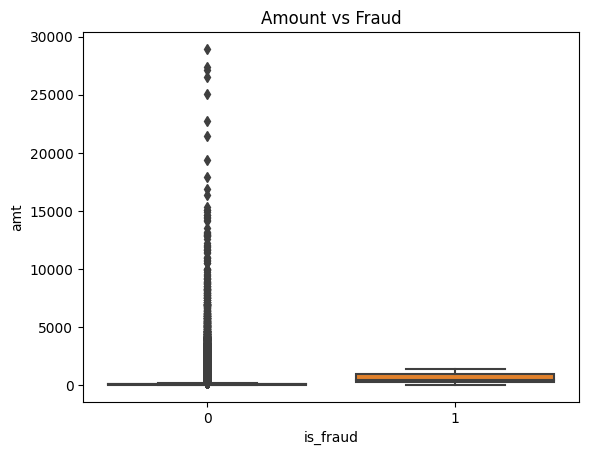

In [78]:
sns.boxplot(x='is_fraud', y='amt', data=fraud_data)
plt.title("Amount vs Fraud")
plt.show()

 Count plot for gender vs fraud

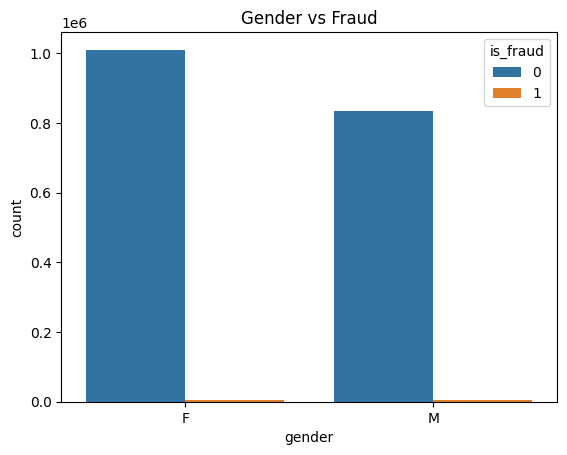

In [79]:
sns.countplot(x='gender', hue='is_fraud', data=fraud_data)
plt.title("Gender vs Fraud")
plt.show()

Count plot for category vs fraud

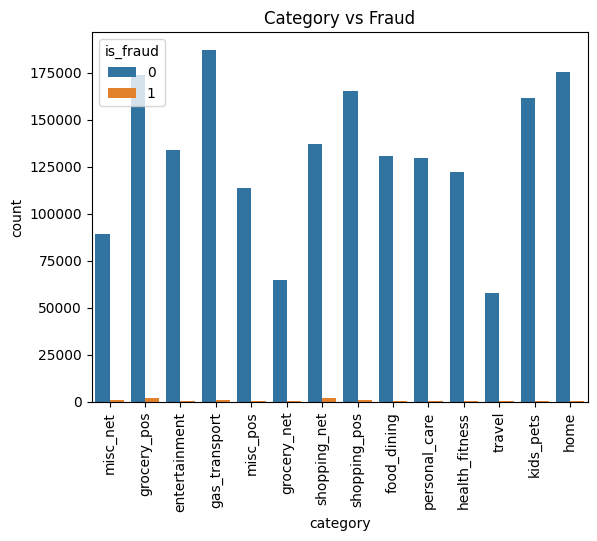

In [80]:
sns.countplot(x='category', hue='is_fraud', data=fraud_data)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

State vs Fraud

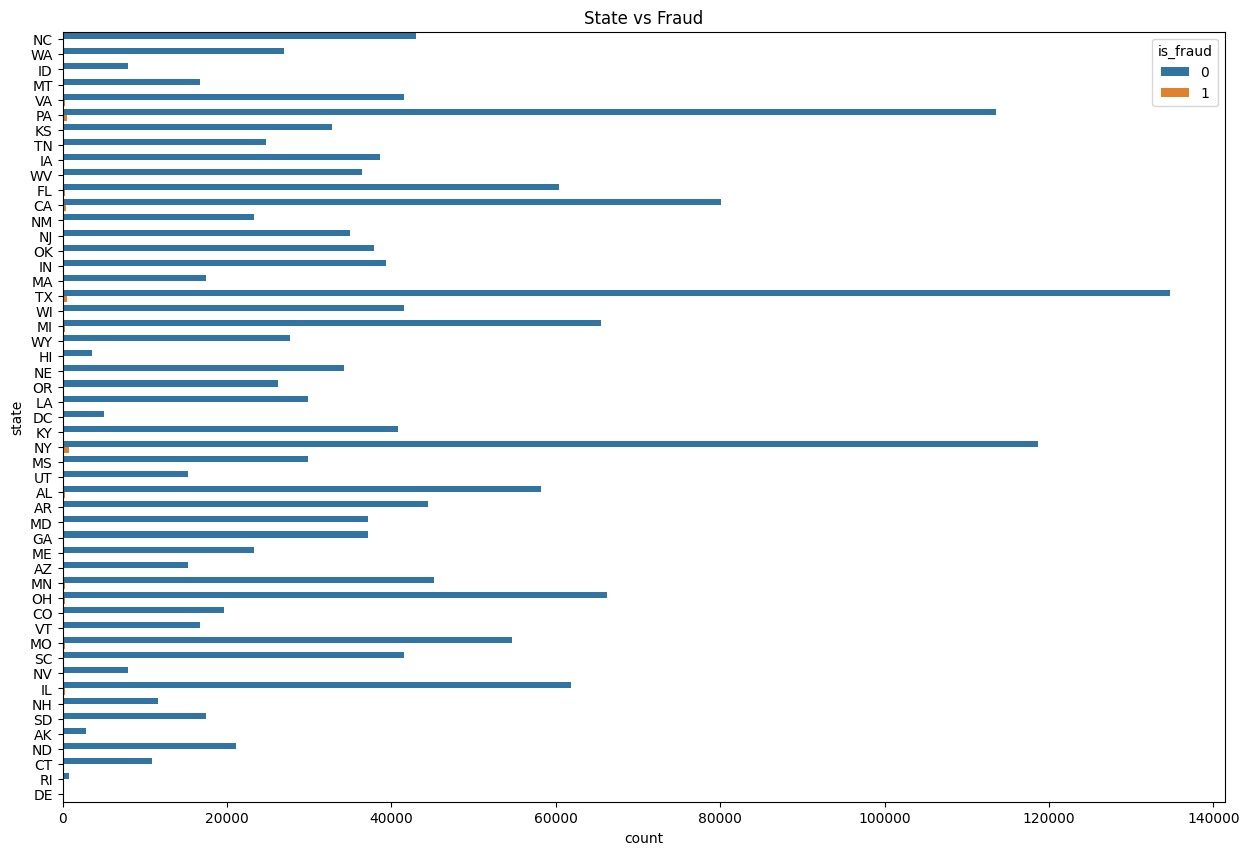

In [81]:
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=fraud_data)
plt.title("State vs Fraud")
plt.show()

Boxplot Age vs Fraud

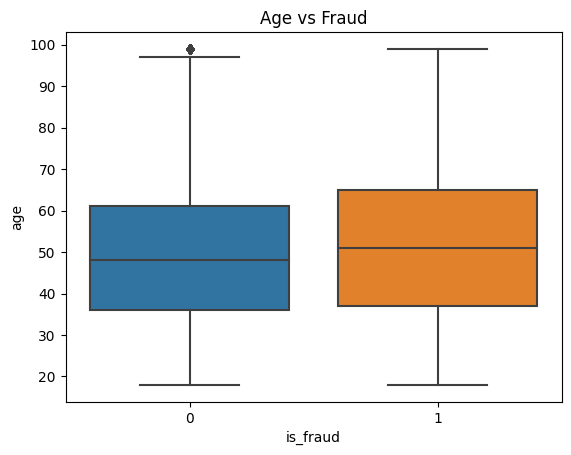

In [82]:
sns.boxplot(y='age', x='is_fraud', data=fraud_data)
plt.title('Age vs Fraud')
plt.show()

Scatterplot Age vs Amounts vs Fraud

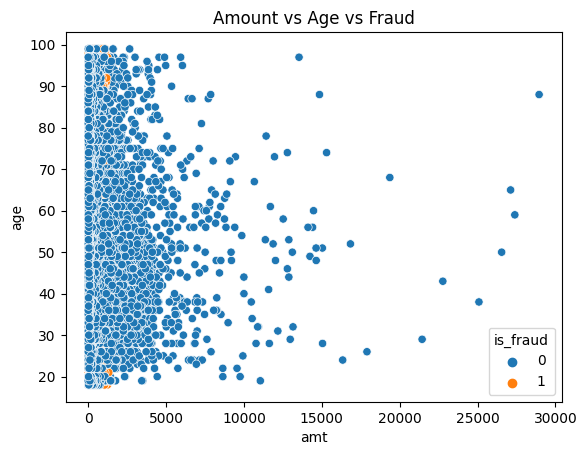

In [83]:
sns.scatterplot(data=fraud_data, x='amt', y='age', hue='is_fraud')
plt.title('Amount vs Age vs Fraud')
plt.show()

Correlation

<Axes: >

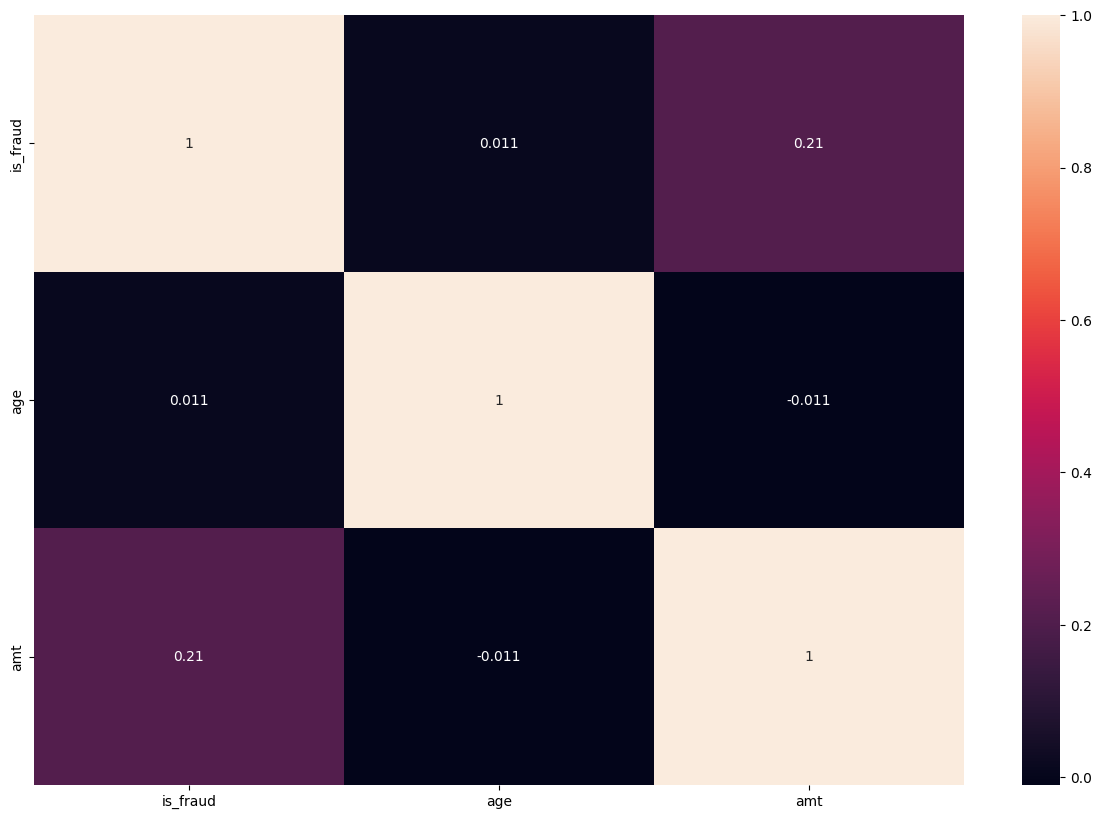

In [84]:
correlation_matrix = fraud_data[['is_fraud', 'age', 'amt']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data=correlation_matrix, annot=True)

Processing the dataset


Convert non-numerical columns to numerical using label encoding

In [9]:
# Convert non-numerical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in fraud_data.select_dtypes(include=['object']).columns:
    fraud_data[column] = label_encoder.fit_transform(fraud_data[column])

# Display the updated dataset
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2703186189652095,514,8,4.97,164,18,0,576,532,27,28654,36.0788,-81.1781,3495,372,80326,1325376018,36.011293,-82.048315,0,35
1,1,630423337322,241,4,107.23,312,161,0,439,619,47,99160,48.8878,-118.2105,149,431,227462,1325376044,49.159047,-118.186462,0,45
2,2,38859492057661,390,0,220.11,116,386,1,610,474,13,83252,42.1808,-112.2620,4154,308,1169030,1325376051,43.150704,-112.154481,0,61
3,3,3534093764340240,360,2,45.00,165,468,1,945,84,26,59632,46.2306,-112.1138,1939,330,777909,1325376076,47.034331,-112.561071,0,56
4,4,375534208663984,297,9,41.96,339,153,1,422,217,45,24433,38.4207,-79.4629,99,116,1186866,1325376186,38.674999,-78.632459,0,37


Convert all columns to the same data type

In [10]:
# Convert all columns to float data type
fraud_data = fraud_data.astype(float)

# Display the updated data types
fraud_data.dtypes

trans_date_trans_time    float64
cc_num                   float64
merchant                 float64
category                 float64
amt                      float64
first                    float64
last                     float64
gender                   float64
street                   float64
city                     float64
state                    float64
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                      float64
trans_num                float64
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
age                      float64
dtype: object

 Balancing the dataset using SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = fraud_data.drop(columns=['is_fraud'])
y = fraud_data['is_fraud']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the count of original classes and resampled classes
print("Class distribution before SMOTE:")
print(y.value_counts())

print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution before SMOTE:
0.0    1842743
1.0       9651
Name: is_fraud, dtype: int64
Class distribution after SMOTE:
0.0    1842743
1.0    1842743
Name: is_fraud, dtype: int64


Visualization of Balancing the Dataset using SMOTE

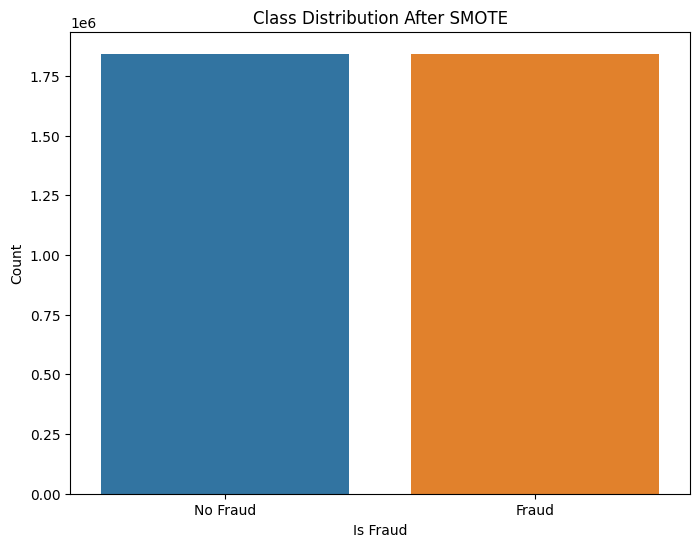

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()


In [13]:
# Calculate class counts after SMOTE
class_0_count_after = sum(y_resampled == 0)
class_1_count_after = sum(y_resampled == 1)

# Check if class counts are even
if class_0_count_after == class_1_count_after:
    print("Classes are balanced after SMOTE")
    print("Class 0 count:", class_0_count_after)
    print("Class 1 count:", class_1_count_after)
else:
    print("Classes are not balanced after SMOTE")
    print("Class 0 count:", class_0_count_after)
    print("Class 1 count:", class_1_count_after)


Classes are balanced after SMOTE
Class 0 count: 1842743
Class 1 count: 1842743


Machine Learning:Random Forest, Decision Tress, and Logistic Regression

Logistic Regression Accuracy: 0.8814
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89    368166
         1.0       0.94      0.81      0.87    368932

    accuracy                           0.88    737098
   macro avg       0.89      0.88      0.88    737098
weighted avg       0.89      0.88      0.88    737098



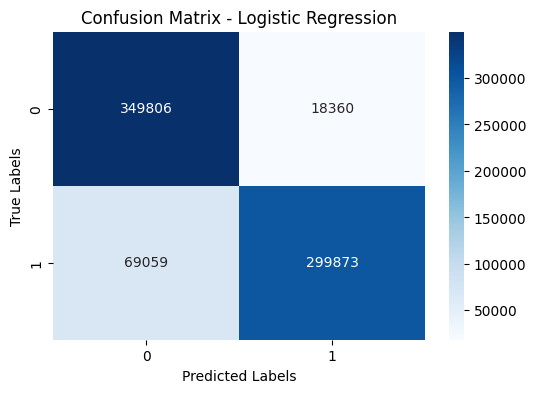

Random Forest Accuracy: 0.9991
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    368166
         1.0       1.00      1.00      1.00    368932

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098



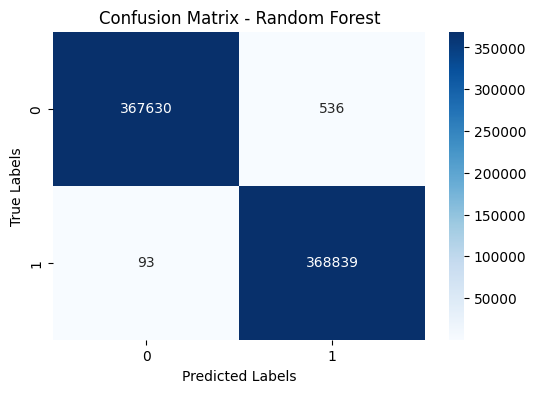

Decision Tree Accuracy: 0.9984
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    368166
         1.0       1.00      1.00      1.00    368932

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098



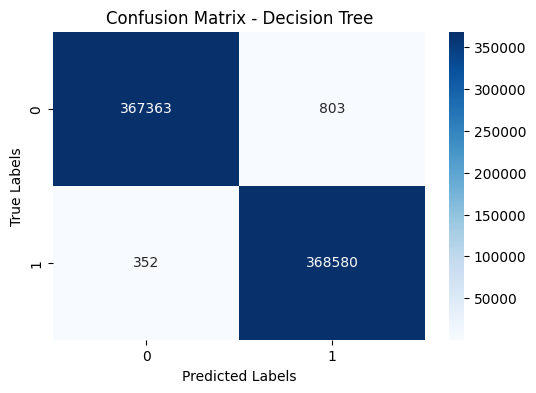

In [59]:
# Convert non-numerical columns to numerical using label encoding
label_encoder = LabelEncoder()
for column in fraud_data.select_dtypes(include=['object']).columns:
    fraud_data[column] = label_encoder.fit_transform(fraud_data[column])

# Separate features and target variable
X = fraud_data.drop(columns=['is_fraud'])
y = fraud_data['is_fraud']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Evaluate the models
def evaluate_model(model, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, predictions))
    plot_confusion_matrix(model_name, y_test, predictions)

# Evaluate models
evaluate_model(lr_model, 'Logistic Regression')
evaluate_model(rf_model, 'Random Forest')
evaluate_model(dt_model, 'Decision Tree')


Deep Learning Model:FeedForward Neural Network

Epoch [1/10] - Loss: 0.0186 - Train Accuracy: 0.9952
Epoch [2/10] - Loss: 0.0150 - Train Accuracy: 0.9961
Epoch [3/10] - Loss: 0.0140 - Train Accuracy: 0.9963
Epoch [4/10] - Loss: 0.0129 - Train Accuracy: 0.9964
Epoch [5/10] - Loss: 0.0120 - Train Accuracy: 0.9965
Epoch [6/10] - Loss: 0.0115 - Train Accuracy: 0.9968
Epoch [7/10] - Loss: 0.0112 - Train Accuracy: 0.9968
Epoch [8/10] - Loss: 0.0110 - Train Accuracy: 0.9969
Epoch [9/10] - Loss: 0.0110 - Train Accuracy: 0.9969
Epoch [10/10] - Loss: 0.0108 - Train Accuracy: 0.9969


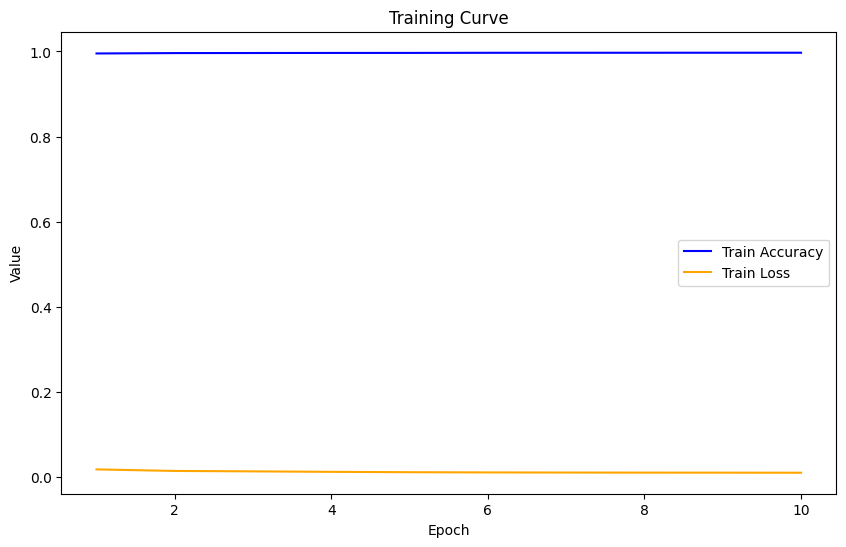

Test Accuracy: 0.9969984803457146


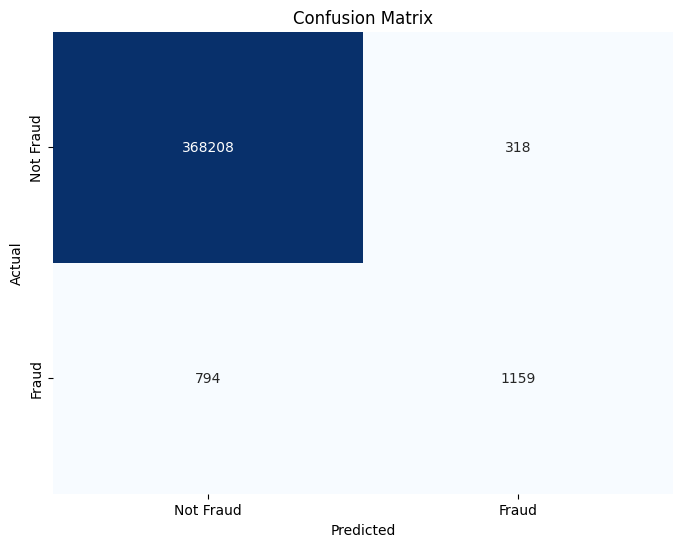

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    368526
       Fraud       0.78      0.59      0.68      1953

    accuracy                           1.00    370479
   macro avg       0.89      0.80      0.84    370479
weighted avg       1.00      1.00      1.00    370479



In [61]:
# Convert non-numerical columns to numerical using label encoding
label_encoder = LabelEncoder()
for column in fraud_data.select_dtypes(include=['object']).columns:
    fraud_data[column] = label_encoder.fit_transform(fraud_data[column])

# Separate features and target variable
X = fraud_data.drop(columns=['is_fraud'])
y = fraud_data['is_fraud']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create a simple feedforward neural network model
class SimpleFNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

# Instantiate the model and optimizer
input_size = X_train.shape[1]
model = SimpleFNN(input_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Lists to store training loss and accuracy values
train_losses = []
train_accuracies = []

# Training loop
num_epochs = 10
batch_size = 32
for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        total_samples += len(batch_y)
        correct_predictions += (outputs >= 0.5).eq(batch_y.unsqueeze(1)).sum().item()

    train_loss = epoch_loss / (total_samples / batch_size)
    train_accuracy = correct_predictions / total_samples
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f}')

# Plot the training and loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Curve')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs >= 0.5).float()
    accuracy = accuracy_score(y_test, test_predictions)
    print("Test Accuracy:", accuracy)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, test_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate classification report
    report = classification_report(y_test, test_predictions, target_names=['Not Fraud', 'Fraud'])
    print("Classification Report:")
    print(report)
